# Simplicial Complexes

In this tutorial, you will learn about simplicial complexes in `TopoNetX`, which are mathematical structures that can be depicted like this:

In [1]:
from IPython import display

display.Image("sc.png")

## Table of contents

1. [Simplexes](#simplexes)
2. [Simplicial complexes](#simplicial_complexes)
3. [Incidence matrices](#incidence_matrices)
4. [Up-Laplacians](#up_laplacians)
5. [Down-Laplacians](#down_laplacians)
6. [Hodge Laplacians](#hodge_laplacians)
7. [Assigning features](#assigning_features)

## 0. Import required packages

In [2]:
import numpy as np

import toponetx as tnx

<a id='simplexes'></a>

## 1. Simplexes

### Informal introduction to the notion of simplex

A simplex is a generalisation of the notion of a triangle $[3]$. The name 'simplex' comes from the fact that it is the simplest polytope (geometric object with flat sides $[4]$) for a given dimension. For example, a 0-simplex is a point, a 1-simplex is a line segment, a 2-simplex is a triangle and a 3-simplex is a tetrahedron. The figure below displays an example of a 1-simplex and an example of a 2-simplex.

### Definition of convex hull

The *convex hull* for a set of points is the smallest convex polygon that encloses all of the points in that set $[5]$.

### Definition of N-simplex

The standard *N-simplex* is the convex hull in $\mathbb{R} ^{N+1}$ of all points with all coordinates zero, except for a single coordinate with value one $[6]$.

<a id='simplicial_complexes'></a>

## 2. Simplicial complexes

### Definition of abstract simplicial complex

A set-family $\Delta$ is called an *abstract simplicial complex* if for every set $X$ in $\Delta$ and every non-empty subset $Y \subseteq X$, the set $Y$ also belongs to $\Delta$ $[1]$.

### Example 1 of simplicial complex: a graph

Consider the undirected graph below, which consists of seven nodes and eight edges. According to the definition of (abstract) simplicial complex, every set of the graph must have all of its non-empty subsets also in the graph. This holds, since for every edge in the graph, the corresponding two vertices belong to the graph.

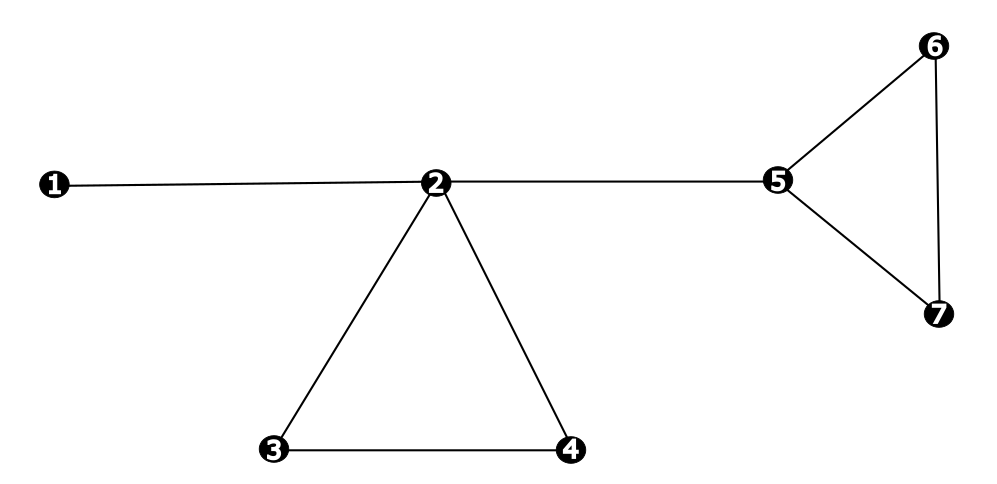

The graph of example 1 can be instantiated in `ToponetX` as a simplicial complex using the code below, based on the *edge set* representation of the graph.

In [3]:
edge_set = [[1, 2], [2, 3], [2, 4], [3, 4], [2, 5], [5, 6], [5, 7], [6, 7]]
ex1_sc = tnx.SimplicialComplex(edge_set)

The simplices forming the simplicial complex corresponding to the graph of example 1 can be listed using the code below.

In [4]:
ex1_sc.simplices

<a id='example_2'></a>

### Example 2 of simplicial complex: a graph with faces

Consider the undirected graph shown below, which consists of five vertices, seven edges and two faces. The faces are displayed as red triangles. While an edge represents a relation between two vertices, a face (red triangle) represents a relation between three vertices. A relation between two vertices (edge) is known as a *binary relation*, whereas a relation involving three or more vertices is known as a *higher-order relation*.

It is easy to confirm that this graph with faces is a simplicial complex. This simplicial complex comprises

- the *vertex set* $[1, 2, 3, 4, 5]$,
- the *edge set* $[[1, 2], [1, 3], [2, 3], [2, 4], [3, 4], [2, 5], [4, 5]]$ and
- the *face set* $[[2, 3, 4], [2, 4, 5]]$.

Vertices, edges and faces are known as *0-rank*, *1-rank* and *2-rank* *cells*, respectively.

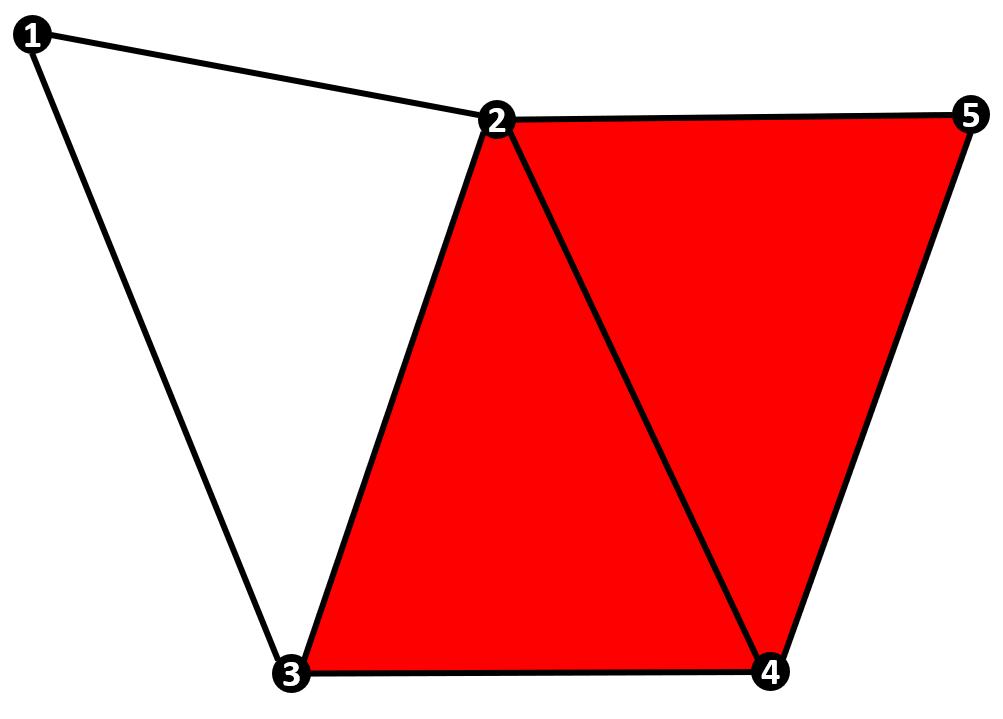

In `ToponetX`, the simplicial complex can be instantiated by specifying its edge set and face set. Notice in the code below that it is not needed to specify the whole edge set; it suffices to provide the edges which do not constitute boundaries of the faces.

In [5]:
edge_set = [[1, 2], [1, 3]]
face_set = [[2, 3, 4], [2, 4, 5]]

ex2_sc = tnx.SimplicialComplex(edge_set + face_set)

The simplices forming the simplicial complex corresponding to the graph of example 2 are shown below.

In [6]:
ex2_sc.simplices

<a id='abstract_simplicial_matrices'></a>

## 2.1 Abstract simplicial complexes
TopoNetX implemenets what is called an abstract simplicial complex. 

Formally, an *abstract simplicial complex* on a finite set $\mathcal{V}$ is denoted by the pair $(\mathcal{V}, \mathcal{X})$, where $\mathcal{X}$ is a subset of the power set of $\mathcal{V}$, satisfying the property that if $x \in \mathcal{X}$ and $y \subset x$, then $y \in \mathcal{X}$.

Here, $\mathcal{V}$ represents the set of vertices of the simplicial complex.

Let's consider an example. Suppose $\mathcal{V} = \{a, b, c\}$, and the set of simplices $\mathcal{X}$ is given by:

$\mathcal{X} = \{\{a\}, \{b\}, \{c\}, \{a, b\}, \{b, c\}, \{a, c\}, \{a, b, c\}\}$

This example satisfies the conditions of an abstract simplicial complex. If a simplex is in $\mathcal{X}$, then all its faces (including itself) are also in $\mathcal{X}$, and if two simplices are in $\mathcal{X}$, their intersection is also in $\mathcal{X}$.

In this case, the pair $(\mathcal{V}, \mathcal{X})$ forms an abstract simplicial complex, and you can visualize it as a geometric object where the vertices are $\{a, b, c\}$ and the simplices correspond to various combinations of these vertices, forming edges and a filled triangle, similar to the example I provided earlier.

<a id='incidence_matrices'></a>

## 3. Incidence matrices

### Definition of incidence matrix

An *incidence matrix* is a matrix that shows the relation between the elements of two sets $X$ and $Y$. The incidence matrix $B$ between $X$ and $Y$ has one row for each element of $X$ and one column for each element of $Y$. The $i$-th row and $j$-th column of the incidence matrix correspond to an element $x_i\in X$ and $y_i\in Y$, respectively. The elements $x_i$ and $y_j$ are called *incident* if they are related to each other; such a relation is specified formally via a neighborhood function. The $(i, j)$-th element $B(i, j)$ of the incidence matrix $B$ is defined as

$B(i, j) =
\left\{
\begin{array}{rl}
       1 & \mbox{if}~x_i~\mbox{and}~y_j~\mbox{are incident},\\
       0 & \mbox{otherwise};\\
\end{array} 
\right.$

see, for example, $[2]$.

The *rank* of an incidence matrix between X and Y refers to the highest rank of the elements in X and Y. For instance, an incidence matrix of rank 1 specifies which vertices are incident with which edges, while an incidence matrix of rank 2 specifies which edges are incident with which faces.

### Example 2 continued: incidence matrices

Here, we demonstrate how incidence matrices retrieve information about relations between cells in the simplicial complex of [example 2](#example_2). Firstly, the incidence matrix $B_{0,1}$ of rank 1 is generated. The matrix $B_{0,1}$ indicates the incidence between 0-rank cells (vertices) and 1-rank cells (edges).

In [7]:
ex2_incidence1_rows, ex2_incidence1_cols, ex2_incidence1 = ex2_sc.incidence_matrix(
    rank=1, index=True
)

Since the simplicial complex contains five vertices and seven edges, $B_{0,1}$ is a $5\times 7$ matrix.

In [8]:
print(ex2_incidence1.shape)

`ex2_incidence1_rows` and `ex2_incidence1_cols` enlist the five vertices and seven edges corresponding to the rows and columns of $B_{0,1}$, respectively. Rows and columns in $B_{0,1}$ as well as vertices within edges are sorted in lexicographic order.

In [9]:
print(ex2_incidence1_rows)
print(ex2_incidence1_cols)

The incidence matrix $B_{0, 1}$ is given by

$B_{0,1} = \begin{pmatrix}
1 & 1 & 0 & 0 & 0 & 0 & 0\\
1 & 0 & 1 & 1 & 1 & 0 & 0\\
0 & 1 & 1 & 0 & 0 & 1 & 0\\
0 & 0 & 0 & 1 & 0 & 1 & 1\\
0 & 0 & 0 & 0 & 1 & 0 & 1\\
\end{pmatrix}$.

The element $(1, 1)$ of $B_{0,1}$ equals $1$, since vertex $1$ is incident to edge $(1, 2)$. On the other hand, the element $(1, 3)$ of $B_{0,1}$ equals $0$, since vertex $1$ is not incident to edge $(2, 3)$. Using `TopoNetX`, $B_{0, 1}$ can be printed as follows. 

In [10]:
print(np.abs(ex2_incidence1.todense()))

An alternative definition of $B_{0,1}$ considers directed edges. Let $x_k$ be a vertex, and $y_l = (x_i, x_j)$ an edge with $x_i < x_j$. The element $(k, l)$ of $B_{0, 1}$ takes the following values:

$\left\{
\begin{array}{rl}
       1 & \mbox{if}~x_k=x_j ,\\
      -1 & \mbox{if}~x_k=x_i ,\\
       0 & \mbox{if}~x_k\ne x_i~\mbox{and}~x_k\ne x_j .\\
\end{array} 
\right.$

An alternative way of thinking about $B_{0,1}$ is that each pair $(x_i, x_j)$ satisfies $x_i < x_j$ and represents a directed edge from $x_j$ to $x_i$, denoted by $x_j\rightarrow x_i$. If the vertex $x_k$ is the start vertex $x_j$ of edge $x_j\rightarrow x_i$, then the element $(k, l)$ of $B_{0, 1}$ equals $1$. If $x_k$ is the end vertex $x_i$ of edge $x_j\rightarrow x_i$, then the element $(k, l)$ of $B_{0, 1}$ equals $-1$. If $x_k$ is neither the start vertex $x_j$ nor the end vertex $x_i$ of edge $x_j\rightarrow x_i$, then the element $(k, l)$ of $B_{0, 1}$ equals $0$.

Based on this definition, the incidence matrix $B_{0,1}$ is given by

$B_{0,1} = \begin{pmatrix}
-1 & -1 & 0 & 0 & 0 & 0 & 0\\
1 & 0 & -1 & -1 & -1 & 0 & 0\\
0 & 1 & 1 & 0 & 0 & -1 & 0\\
0 & 0 & 0 & 1 & 0 & 1 & -1\\
0 & 0 & 0 & 0 & 1 & 0 & 1\\
\end{pmatrix}$.

Using `TopoNetX`, this signed version of $B_{0, 1}$ can be printed as shown below. 

In [11]:
print(ex2_incidence1.todense())

Similarly, it is possible to derive the matrix $B_{1, 2}$ of rank 2. The matrix $B_{1,2}$ indicates the incidence between 1-rank cells (edges) and 2-rank cells (faces).

In [12]:
ex2_incidence2_rows, ex2_incidence2_cols, ex2_incidence2 = ex2_sc.incidence_matrix(
    rank=2, index=True
)

Since the simplicial complex contains seven edges and two faces, $B_{1,2}$ is a $7\times 2$ matrix.

In [13]:
print(ex2_incidence2.shape)

`ex2_incidence2_rows` and `ex2_incidence2_cols` enlist the seven edges and two faces corresponding to the rows and columns of $B_{1,2}$, respectively. Rows and columns in $B_{1,2}$ as well as vertices within edges and vertices within faces are sorted in lexicographic order.

In [14]:
print(ex2_incidence2_rows)
print(ex2_incidence2_cols)

The incidence matrix $B_{1, 2}$ is given by

$B_{1,2} = \begin{pmatrix}
0 & 0\\
0 & 0\\
1 & 0\\
1 & 1\\
0 & 1\\
1 & 0\\
0 & 1\\
\end{pmatrix}$.

The first column of $B_{1, 2}$ is related to face $(2, 3, 4)$. The edges incident to face $(2, 3, 4)$ are $(2, 3)$, $(2, 4)$ and $(3, 4)$, corresponding to the elements in the third, fourth and sixth rows (and first column) of $B_{1, 2}$, each with value equal to one. The rest of the elements (at the intersection of the first, second, fifth and seventh row with the first column) have zero values, since they correspond to edges not incident to face $(2, 3, 4)$. Similarly, the second column of $B_{1, 2}$ has non-zero elements only in the fourth, fifth and seventh rows, which correspond to edges $(2, 4)$, $(2, 5)$ and $(4, 5)$, all of which are incident to face $(2, 4, 5)$. $B_{1, 2}$ can be printed via `TopoNetX` as follows.

In [15]:
print(np.abs(ex2_incidence2.todense()))

The signed version of $B_{1, 2}$ is shown below. To identify whether the sign is negative or positive for each non-zero element in $B_{1, 2}$, each face is traversed anticlockwise yielding a positive sign when a traversed edge of the face shares the same direction with the edge in the relevant row of $B_{1, 2}$ (and a negative sign otherwise).

In [16]:
print(ex2_incidence2.todense())

<a id='up_laplacians'></a>

## 4. Up-Laplacians

### Definition of up-Laplacian

The up-Laplacian of rank 0 is a $k \times k$ matrix $\mathcal{L}_{up}$, where $k$ is the number of vertices in the simplicial complex. Let $\mathcal{L}_{up}(i,j)$ be the $(i, j)$-th element of $\mathcal{L}_{up}$. For $i\neq j$, $\mathcal{L}_{up}(i,j)= 0$ if the $i$-th vertex is not incident to $j$-th vertex via an edge incident to $i$-th vertex, whereas $\mathcal{L}_{up}(i,j)\neq$ 0 if it is incident. For $i = j$, $\mathcal{L}_{up}(i,j)$ = n $\in \mathbb{N}$ if the $i$-th vertex is incident to $n$ edges. 

The up-Laplacian of rank 1 is a $k \times k$ matrix $\mathcal{L}_{up}$, wher $k$ is the number of eges in the simplicial complex. For $i \neq j$, $\mathcal{L}_{up}(i,j) = 0$ if the $i$-th edge is not incident to $j$-th edge via a face incident to $i$-th edge, whereas $\mathcal{L}_{up}(i,j)\neq$ 0 if it is incident. For $i = j$, $\mathcal{L}_{up}(i,j)$ = n $\in \mathbb{N}$ if the $i$-th edge is incident to $n$ faces. 

### Example 2 continued: up-Laplacians

The up-Laplacian function `up_laplacian_matrix` returns a matrix where row 1 will return the up-Laplacian of edge 1, row 2 will return the up-Laplacian of edge 2 and so on. 

The up-Laplacian takes an edge, in the diagram below we see the up-Laplacian of the third edge $[2,3]$, and sees which faces are incident to that edge. In this example we have that $[2,3]$ is incident to the face $[2,3,4]$. Finally, it returns which edges are incident to that face. The edges incident to the face $[2,3,4]$ in this example are the edges $[2,3], [2,4], [3,4]$. As these are the third, fourth and sixth edges in the list, the third row of the up-Laplacian for example2 will have non-zero values for the third, fourth and sixth columns. 

The diagonal of the matrix describes how many faces are incident to that edge aka the degree of that edge. Looking at the diagram, it is obvious that edges such as $[2,3]$ are incident to one face, but that the edge $[2,4]$ is incident to two faces. 

Matrix entries off of the diagonal show which edges are incident, as per the method explained above.

In [17]:
# up-Laplacian rank 0: incidence between vertices via edges
up_laplacian_0 = ex2_sc.up_laplacian_matrix(rank=0).todense()
print(up_laplacian_0)

An up-Laplacian of rank 0 looks at going from a vertex to its incident edges to its incident vertices. The matrix above is the output of the up-Laplacian of rank 0 on the simplicial complex of example 2. 

This simplicial complex had vertices $[1,2,3,4,5]$ and edges $[1,2],[1,3],[2,3],[2,4],[2,5],[3,4],[4,5]$. The matrix is a 5x5 as it is looking at a vertex and then outputting which vertices are incident to the edges incident to the vertex. 

Row 1 of this matrix is looking at vertex 1. As we can see, vertex 1 is incident to edges $[1,2], [1,3]$. In turn those edges are incident to the vertices 1, 2 and 3. This is seen in the matrix as the first, second and third values of row 1 are non-zero. We may notice that the first entry of this row is different to the other non-zero entries, this is because it is on the diagonal and so represents how many edges vertex 1 is incident to.

Row 5 of this matrix is looking at vertex 5. Vertex 5 is incident to edges $[2,5], [4,5]$ which are incident to the vertices 2, 4 and 5. This is seen in the matrix as on the fifth row the second, fourth and fifth entries are non-zero. The fifth entry is 2, as it is on the diagonal and so is also representing how many edges vertex 5 is incident to. 

In [18]:
# up laplacian rank 1: edge to incident faces to incident edges
up_laplacian_1 = ex2_sc.up_laplacian_matrix(rank=1).todense()
print(up_laplacian_1)

An up-Laplacian of rank 1 looks at going from an edge to its incident faces to its incident edges, like in the diagram above. 

Row 1 is looking at the first edge in our list of edges, $[1,2]$. From the diagram we can easily see that this edge is not incident to any faces as there are no red areas adjacent to the edge. This explains why row 1 is full of zero-entries, as there are no faces incident to the edge it means there can not be edges incident to those faces for the output. 

Row 4, however, has lots of non-zero entries. The fourth edge in our list is $[2,4]$, this edge is incident to faces $[2,3,4], [2,4,5]$. These faces are incident to the edges $[2,3], [2,4], [2,5], [3,4], [4,5]$, which are the third, fourth, fifth, sixth and seventh edges in the list. The matrix represent this as the equivalent entries in row 4 are non-zero. The fourth entry is different as it is on the diagonal, so it has value 2 to represent the 2 faces that the fourth edge is incident to.

There can be no up-Laplacian of rank 2 because it would mean that its input and output would both be faces, but there is no 'up' from a face to a higher dimension. Trying to do get an up-Laplacian of rank 2 will just throw an error.   

<a id='down_laplacians'></a>

## 5. Down-Laplacians

### Definition of down-Laplacian

<ins>*Rank 1:* </ins>

A matrix of $k \times k$ dimensions such that $k$ is the number of edges in the simplicial complex.

For i $\neq$ j,

$\mathcal{L}_{down}(i,j)$ = 0 if the i$^{th}$ edge is not incident to j$^{th}$ edge via a vertex incident to i$^{th}$ edge, $\neq$ 0 if it is incident.

For i = j, 

$\mathcal{L}_{down}(i,j)$ = n $\in \mathbb{N}$ if the i$^{th}$ edge is incident to n vertices. 

<ins>*Rank 2:*</ins>

A matrix of $k \times k$ dimensions such that $k$ is the number of faces in the simplicial complex.

For i $\neq$ j,

$\mathcal{L}_{down}(i,j)$ = 0 if the i$^{th}$ face is not incident to j$^{th}$ face via an edge incident to i$^{th}$ face, $\neq$ 0 if it is incident.

For i = j, 

$\mathcal{L}_{down}(i,j)$ = n $\in \mathbb{N}$ if the i$^{th}$ face is incident to n edges. 

### Example 2 continued: down-Laplacians

Similarly we have a *down-Laplacian*. A down-Laplacian can have ranks 1 and 2. Rank 1 will take a given edge, look at its incident vertices and then return the edges incident to those vertices. Rank 2 will take a given face, look at its incident edges and return the faces incident to those edges.

Much like the up-Laplacian, the reason there is no down-Laplacian of rank 0 is because the input is a vertex so there is no dimension to go 'down' to when looking at incidence. Another similarity is that the diagonal of the down-Laplacian will represent how many of the object in the dimension below it is incident to.

The diagram below is a visualisation of what the down-Laplacian of rank 1 looks at. This example has taken the third edge $[2,3]$ and looked at the dimension below to see which vertices that edge is incident to. In this case we get 2 and 3. Now, it outputs every edge that vertex is incident to: $[1,2],[1,3],[2,3],[2,4],[2,5],[3,4]$. These edges are the first - sixth edges in the list, this will be represented in the down-Laplacian matrix by the third row having non-zero entries for the first, second, third, fourth, fifth and sixth entries of that row.

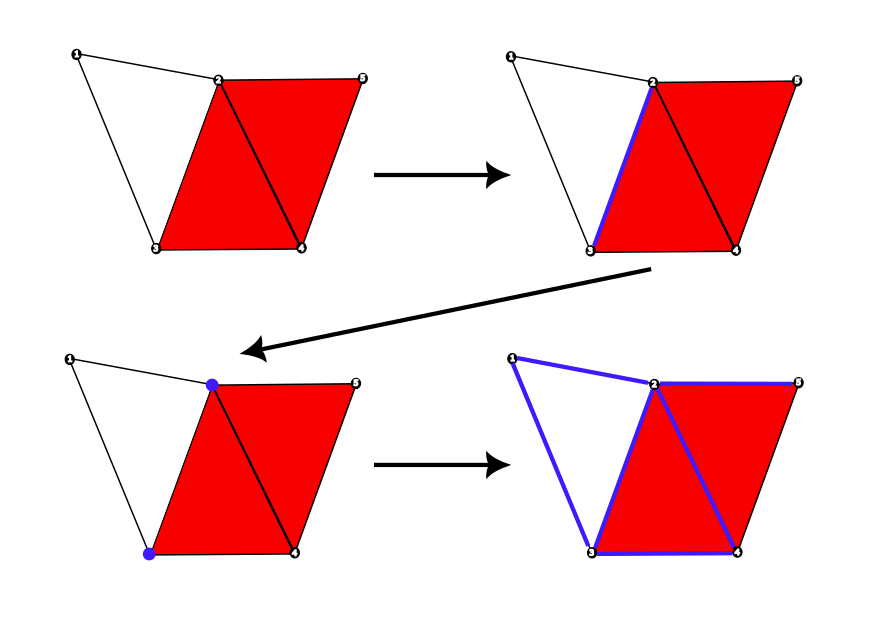

In [19]:
# down laplacian rank 1: edges to incident nodes to incident edges
down_laplacian_1 = ex2_sc.down_laplacian_matrix(rank=1).todense()

print(down_laplacian_1)

This is the down-Laplacian of rank 1 for example2, it goes from edges to vertices to edges. 

Row 1 represents the down-Laplacian for the first edge in the list of edges, this is the edge $[1,2]$. This is incident to the vertices 1 and 2. These vertices are then incident to the edges $[1,2], [1,3], [2,3], [2,4], [2,5]$. These edges are the first, second, third, fourth and fifth edges in our list of edges, so this is represented in the matrix by row 1 having non-zero values for those entries. The first number is on the diagonal, so it has a value of 2 to show that the first edge is incident to two vertices. 

In [20]:
# down laplacian rank 2: face to incident edges to incident faces
down_laplacian_2 = ex2_sc.down_laplacian_matrix(rank=2).todense()

print(down_laplacian_2)

This is the down-Laplacian of rank 2, it is notably smaller than the other matrices we have encountered because in example2 we only have two faces so the matrix is of size 2x2. This matrix goes from faces to edges to faces. 

Row 1 represents the first face $[2,3,4]$, this is incident to the edges $[2,3],[2,4],[3,4]$. These edges are then incident to both $[2,3,4], [2,4,5]$. Therefor there are no non-zero entries in this row. 

A similiar logic explains row 2 for the face $[2,4,5]$.

Both of the diagonal entries have value 3 because each face is incident to 3 edges. 

<a id='hodge_laplacians'></a>

## 6. Hodge Laplacians

### Definition of Hodge Laplacian

Hodge Laplacian matrix has entry $\mathcal{L}_p(i,j)$, made from up-Laplacian values $\mathcal{L}_{up}(i, j)$ and down-Laplacian values $\mathcal{L}_{down}(i, j)$ such that

$\mathcal{L}_p(i,j)$ = $\mathcal{L}_{up}(i, j)$ + $\mathcal{L}_{down}(i, j)$. 

That is, any entry $(i,j)$ in the Hodge Laplacian matrix is generated by the addition of the equivalent $(i,j)$ values in the up-Laplacian and down-Laplacian matrices. 

### Relation of Hodge Laplacian to up-Laplacian and down-Laplacian

From our definition of Hodge Laplacian, and given what we know about up-Laplacian and down-Laplacian, it may cause us to think about the fact that up-Laplacian only has ranks of 0 and 1 and that down-Laplacian only has ranks of 1 and 2. This means that when we are finding the Hodge Laplacian of rank 0, there are no $\mathcal{L}_{down}(i, j)$  values to be added to $\mathcal{L}_p(i,j)$. Similarly, for a Hodge Laplacian of rank 2, there are no $\mathcal{L}_{up}(i, j)$ values to be added to $\mathcal{L}_p(i,j)$. This leads to the following:

Hodge Laplacian rank 0: $\mathcal{L}_p(i,j)$ = $\mathcal{L}_{up}(i, j)$

Hodge Laplacian rank 1: $\mathcal{L}_p(i,j)$ = $\mathcal{L}_{up}(i, j)$ + $\mathcal{L}_{down}(i, j)$

Hodge Laplacian rank 2: $\mathcal{L}_p(i,j)$ = $\mathcal{L}_{down}(i, j)$. 

In [21]:
hodge_laplacian_0 = ex2_sc.hodge_laplacian_matrix(rank=0).todense()

print(hodge_laplacian_0)

This is the Hodge Laplacian matrix of rank 0 for example2. From our definitions above, we can see that this will just be the up-Laplacian matrix of rank 0 - directly compare this to the output above in the up-Laplacian section to confirm. 

In [22]:
hodge_laplacian_1 = ex2_sc.hodge_laplacian_matrix(rank=1).todense()

print(hodge_laplacian_1)

This is the Hodge Laplacian matrix of rank 1 for example2. This is the up-Laplacian and down-Laplacian of rank 1 added together. The diagonal now tells us how many objects of dimension one above and one below an edge are incident with that edge. In this case it is representing how many vertices and how many faces combined are incident to an edge. Entry $[4,4]$ for example, is on the diagonal so has a value of 4 as the fourth edge in the list is $[2,4]$ which is incident to 2 faces and 2 vertices. 

In [23]:
hodge_laplacian_2 = ex2_sc.hodge_laplacian_matrix(rank=2).todense()

print(hodge_laplacian_2)

This is the Hodge Laplacian matrix of rank 2 for example2. From our definitions above, we can see that this will just be the down-Laplacian matrix of rank 2 - directly compare this to the output above in the down-Laplacian section to confirm.

<a id='assigning_features'></a>

## 7. Assigning features

The next step is to start assigning data or ’features’ to the faces/edges/vertices.
One way of doing this is with the `set_simplex_attributes`
function available. Below is an example of how it can be used.

In [24]:
# setting what data we want to attach to which faces. order here is important.
face_data = {(2, 3, 4): {"weight": 1}, (2, 4, 5): {"weight": 5}}
ex2_sc.set_simplex_attributes(face_data)

Here we have created a dictionary titled `face_data`. This dictionary has listed the faces that we have decided to assign data to, then an attribute name and a value for that attribute, for each face. In this example the attribute is called 'weight'. The different faces in this set can have the same attributes or different ones i.e. there would be no issues giving the face $[2,4,5]$ a different attribute called 'weight2' in our `face_data`. 

The second line uses the function `set_simplex_attributes` to set the attributes to the simplicial complex, in this case we are using our simplicial complex from earlier titled `example2`. 

In [25]:
face_weights = ex2_sc.get_simplex_attributes("weight")
example2_face_values = np.array(list(face_weights.values()))

print(face_weights)
print(example2_face_values)

The `get_simplex_attributes` function displays the sets of the faces that have the attribute in question and what value is associated with it. In this example, we are getting the attribute 'weight' for the two faces $[2,3,4], [2,4,5]$. We see that `toponetx` follows the same API as `networkx`, specifically with its related methods `get_node_attributes` and `get_edge_attributes`.

The second line is a way of formatting just the values of the weights into a list.

Below shows a visual representation of each face highlighted and labelled with its assigned value.

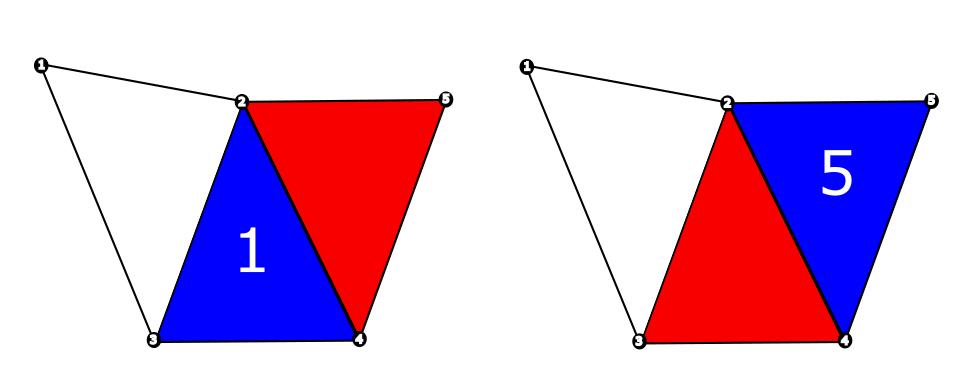

In [26]:
print(ex2_incidence2.shape)
ex2_incidence2.dot(example2_face_values)

The cell above has computed the dot product between the list of data values and the B2 matrix which, as defined above, is an incidence matrix of degree 2 so looks at which edges are associated with which faces. The output of this cell is spreading those data values out onto the edges, proportional to the faces.

What if we have edge data we want to push out proportionally to the faces? We need
to transpose the B2 matrix. 

In [27]:
edge_data = {
    (1, 2): {"attr": 6},
    (1, 3): {"attr": -13},
    (2, 3): {"attr": -6},
    (2, 4): {"attr": 7},
    (3, 4): {"attr": 12},
    (2, 5): {"attr": 19},
    (4, 5): {"attr": 19},
}

ex2_sc.set_simplex_attributes(edge_data)

edge_attrs = ex2_sc.get_simplex_attributes("attr")
example2_edge_values = np.array(list(edge_attrs.values()))

new_face_feature = ex2_incidence2.T.dot(example2_edge_values)

print(new_face_feature)

This is a reverse of the process above. We start with a dictionary we have defined called `edge_data`, made up of edges and attributes and values we wish to assign to them. These attributes are assigned to the simplicial complex `example2`. Then, we create a list of all the data values and dot this but with a transposed version of the `incidence_2` matrix - as we are now going from edges to faces. 

The output of this is the new values assigned to the faces, which is proportional from the edges and their original values. 

## References

$[1]$: Wikipedia. (2022). Abstract simplicial complex. [online] Available at: https://en.wikipedia.org/wiki/Abstract_simplicial_complex [Accessed 22 Feb. 2023].

$[2]$: www.scientificlib.com. (n.d.). *Incidence matrix*. [online] Available at: http://www.scientificlib.com/en/Mathematics/LX/IncidenceMatrix.html. [Accessed 3 Jan. 2023].

$[3]$: Wikipedia. (2020). Simplex. [online] Available at: https://en.wikipedia.org/wiki/Simplex.

$[4]$: Wikipedia. (2023). Polytope. [online] Available at: https://en.wikipedia.org/wiki/Polytope [Accessed 2 Feb. 2023].

$[5]$: Sommer, P. (2020). A gentle introduction to the convex hull problem. [online] Medium. Available at: https://medium.com/@pascal.sommer.ch/a-gentle-introduction-to-the-convex-hull-problem-62dfcabee90c.

$[6]$: Schneider, J. (2019). Geometry of Simplexes. [online] Available at: http://homepages.math.uic.edu/~jschnei3/Writing/Simplexes [Accessed 2 Feb. 2023].

$[7]$: Wikipedia. (2020). Sparse matrix. [online] Available at: https://en.wikipedia.org/wiki/Sparse_matrix.